# 線形補間 
作成：瀧川英輝

In [3]:
println(readall(`cmd /c type lin_interp.jl`))


function my_lin_interp(grid,vals)
    function func(x::Real)
        if x < grid[1]
            y = ((vals[2]-vals[1])/(grid[2]-grid[1]))*(x-grid[1])+vals[1]
            return y
        end
        if x >= grid[end]
            y = ((vals[end]-vals[end-1])/(grid[end]-grid[end-1]))*(x-grid[end-1])+vals[end-1]
            return y
        end
        if grid[1] <= x < grid[end]
            i = searchsortedlast(grid, x)
            y = ((vals[i+1]-vals[i])/(grid[i+1]-grid[i]))*(x-grid[i])+vals[i]
            return y
        end
    end
    function func{T<:Real}(x::AbstractVector{T})
        n = length(x)
        out = Array(Any,n)
        for i in 1:n
            out[i] = func(x[i])
        end
        return out
    end
    return func
end



In [4]:
include("lin_interp.jl")

my_lin_interp (generic function with 1 method)

## 簡単な例を試してみる

In [14]:
grid = [1, 2]
vals = [2, 0]
h = my_lin_interp(grid, vals)

h([0, 1, 1.5, 2, 3])

5-element Array{Any,1}:
  4.0
  2.0
  1.0
  0.0
 -2.0

## 次にプロットしてみる

In [10]:
g(x) = 2 .* cos(6x) .+ sin(14x) .+ 2.5

g (generic function with 1 method)

In [16]:
using PyPlot

In [89]:
e = 0:0.01:1
units = [.2, .1, .05]
grids = [0:unit:1 for unit in units]
interps = [my_lin_interp(grid, g(grid)) for grid in grids]

3-element Array{Function,1}:
 func
 func
 func

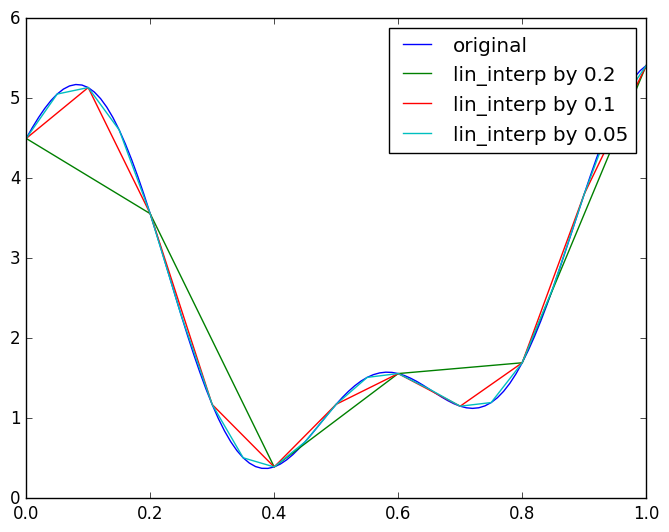

PyObject <matplotlib.legend.Legend object at 0x00000000153E2B38>

In [90]:
plot(e,g(e),label="original")
for (unit,grid,interp) in zip(units,grids,interps)
    plot(grid,interp(grid),label="lin_interp by $unit")
end
legend()

## 次に残差をプロットする

In [92]:
# 繰り返しを避けようとしてもうまくいかずエラーになるので、繰り返しのままにしました
residual_a(x) = g(x) - interps[1](x)
residual_b(x) = g(x) - interps[2](x)
residual_c(x) = g(x) - interps[3](x)
residuals = [residual_a, residual_b, residual_c]

3-element Array{Function,1}:
 residual_a
 residual_b
 residual_c

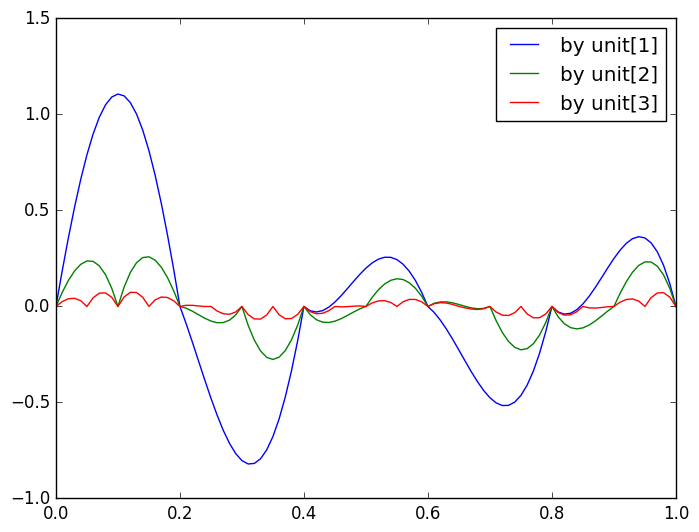

PyObject <matplotlib.legend.Legend object at 0x00000000165A59B0>

In [91]:
plot(x,residual_a(x),label="by unit[1]")
plot(x,residual_b(x),label="by unit[2]")
plot(x,residual_c(x),label="by unit[3]")
legend()